## Exploratory Data Analysis and Classification Using the Titanic Dataset

In this notebook we will explore some common techniques for data visualization and feature engineering using the Titanic data set.

We will then create a machine learning model for classification of whether a passenger will survive.

Let's get started!

In [68]:
# The Titanic Dataset is a great way to understand the foundations of a Classification problem using real world historical data.
# As always begin by loading packages needed for analysis

import numpy as np
import pandas as pd
import random as rd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
#import train and test data and combine into full set for data cleaning
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
full =[train, test]

In [10]:
#account for the overall shape of the data to observe if missing values may be an issue
train.shape
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
#isolate id
passenger_id = test['PassengerId']

#Have a look at the data
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


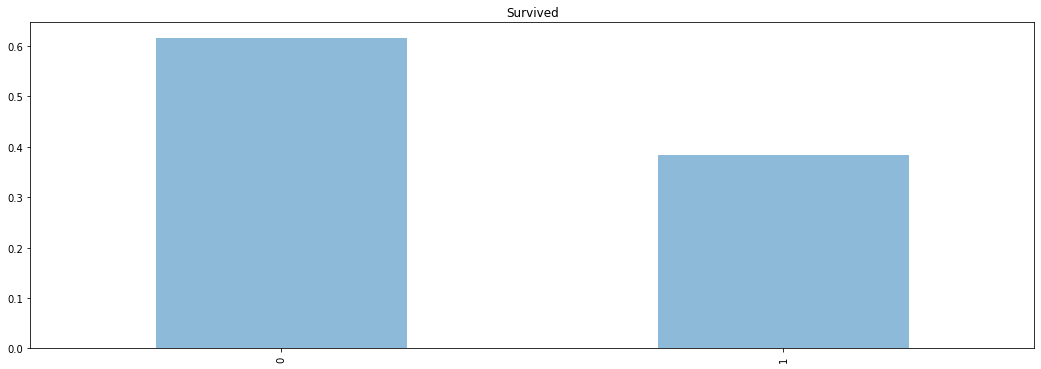

In [26]:
#bar plot the count of passengers who survived normalized by percentage
fig=plt.figure(figsize=(18,6))
train.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Survived")
plt.show()

Text(0.5, 1.0, 'Age of Survivors')

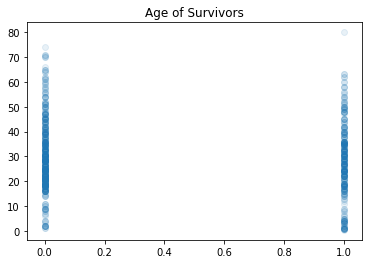

In [28]:
#Let's take a look at the range of ages for survivors
plt.scatter(train.Survived, train.Age, alpha=0.1)
plt.title("Age of Survivors")

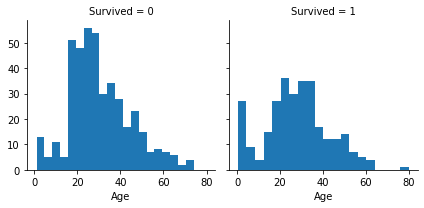

In [71]:
#alternate view of age and survival with histogram
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

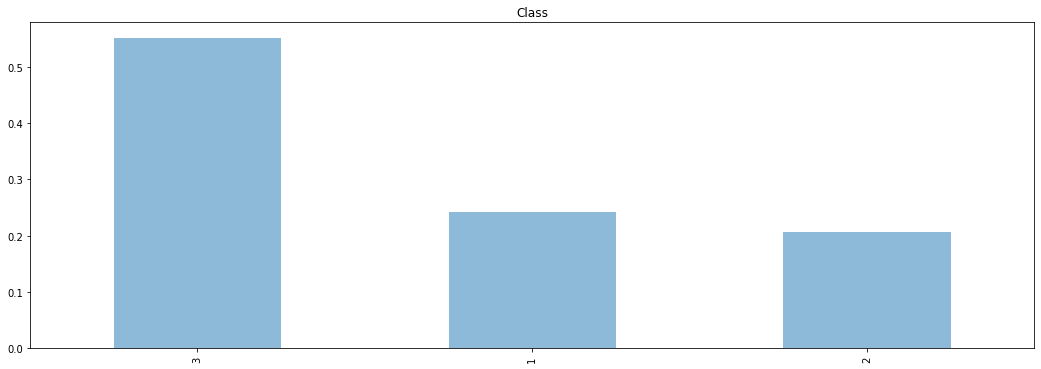

In [29]:
#bar plot of class of passengers
fig=plt.figure(figsize=(18,6))
train.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Class")
plt.show()

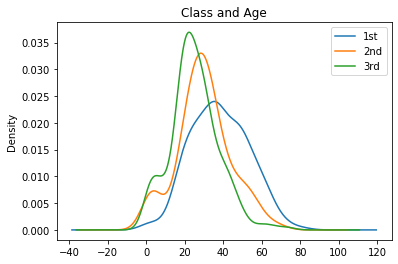

In [31]:
#plot relationship between Class and Age
for x in [1,2,3]:
    train.Age[train.Pclass==x].plot(kind="kde")
plt.title("Class and Age")
plt.legend(("1st", "2nd", "3rd"))


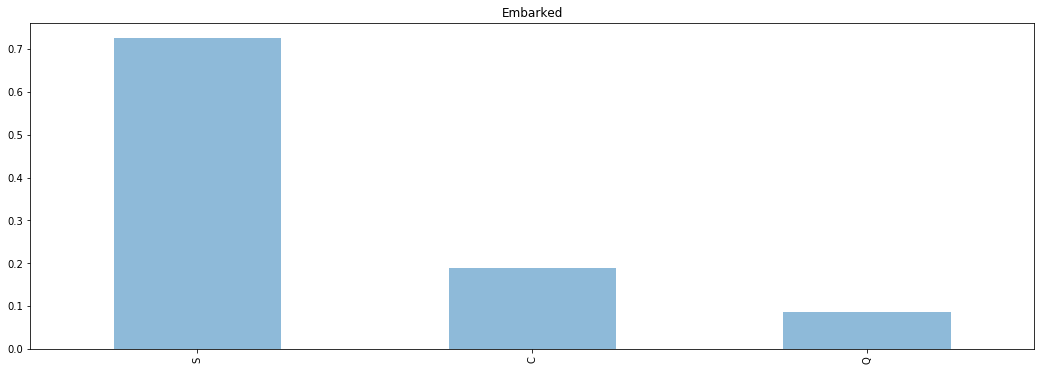

In [32]:
#bar plot of class of passengers
fig=plt.figure(figsize=(18,6))
train.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5)
plt.title("Embarked")
plt.show()

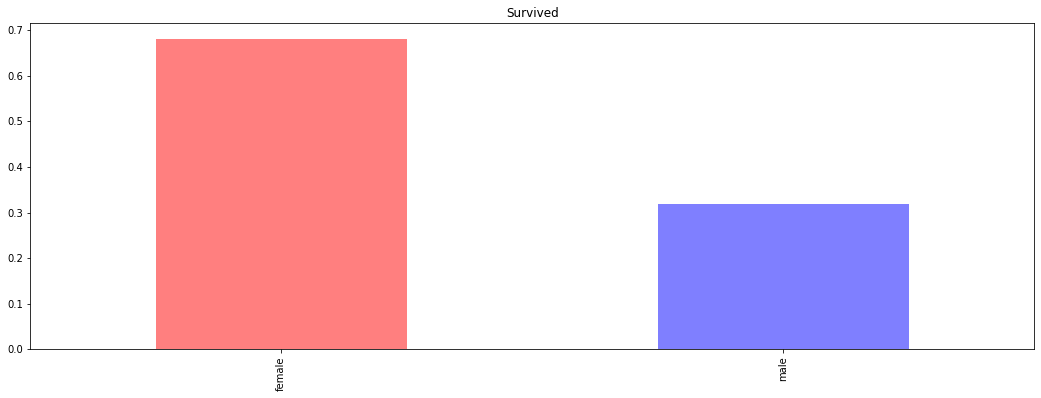

In [39]:
#bar plot of the survival rates by gender
fig=plt.figure(figsize=(18,6))
train.Sex[train.Survived== 1].value_counts(normalize=True).plot(kind="bar",alpha=0.5, color=['red', 'blue'])
plt.title("Survived")
plt.show()

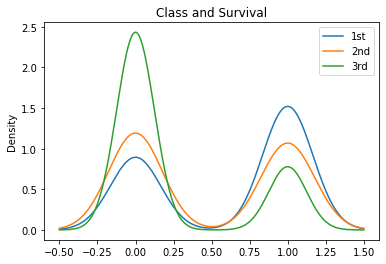

In [43]:
#Visualizing class and survival
for x in [1,2,3]:
    train.Survived[train.Pclass==x].plot(kind="kde")
plt.title("Class and Survival")
plt.legend(("1st", "2nd", "3rd"))

## Feature engineering

Let's clean our data to make it more usable in our machine learning model. 

Pre-processing includes handling missing values, making sure our variables are of the correct type for modelling and feature selection.

In [72]:
#After noting variable relationships we can drop a few features not highly correlated to scale down our data set
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
full = [train, test]

In [73]:
#converting string value of Sex to numerical feature
for data in full:
    data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [75]:
#fill in missing 'Age' values
for data in full:
    data['Age'] = data['Age'].fillna(data['Age'].dropna().median())

In [76]:
#fill in missing 'Fare' values
for data in full:
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())

In [78]:
#fill in missing embarked values
#code for this part from Manav Sehgal kernel

freq_port = train.Embarked.dropna().mode()[0]
freq_port

for data in full:
    data['Embarked'] = data['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [79]:
for data in full:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [80]:
#code for this part from Manav Sehgal kernel
#create a new variable using passenger id and name to extract meaning from proper titles in name correlated with class and survival

for data in full:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [82]:
#replace titles for coherence
for data in full:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [83]:
#convert values to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in full:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1


In [84]:
#drop name and passenger id from dataset
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
full = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

## Creating our machine learning models

Now it's time to create our models. This is a supervised learning problem since our data is labelled with the survival binary. Since this is a classification problem we will try a few models including Logistic Regression, K- nearest neighbors, Naive Bayes, and Random Forest. It's always best to use multiple models to compare the score.

In [85]:
#split the data into train and testing groups for modelling
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [86]:
#simple logistic regression model

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\ovall\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


81.59

In [88]:
#k nearest neighbor model- features are classified by nearest majority of instances

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In [89]:
#naive bayes classification

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.57

In [90]:
#random forest- ensemble method of classification involving multiple decision trees

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

Of the models tested, random forest was the highest scoring although generally if a score is over the 90% threshold it may be overfitting. It wil do for this simple notebook but in the future we will get into more complex feature engineering to avoid this possibility!